In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Text(0, 0.5, 'Total Bedrooms')

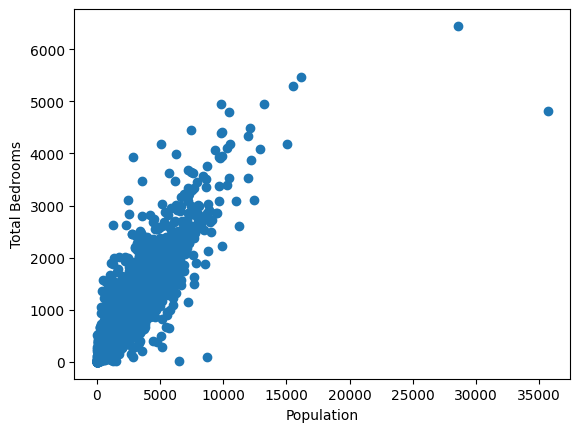

In [3]:
import matplotlib.pyplot as plt
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [4]:
pop_np = pop.to_numpy()
bedrooms_np = bedrooms.to_numpy()

pop_np.shape, bedrooms_np.shape

((17000,), (17000,))

In [6]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression().fit(pop_np.reshape((17000, 1)), bedrooms_np)
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1)))
sklearn_bedroom_predictions.shape

(17000,)

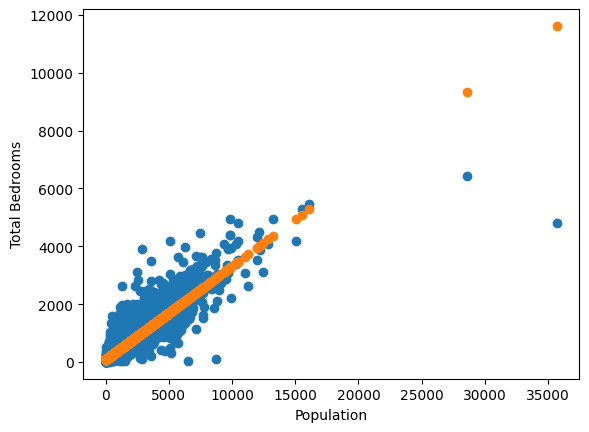

In [8]:
import matplotlib.pyplot as plt
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, sklearn_bedroom_predictions)

In [9]:
predictions_df = pd.DataFrame({'Population':pop
                               , 'Bedrooms': bedrooms
                               , 'Sklearn Bedroom Predictions': sklearn_bedroom_predictions})
predictions_df

,Population,Bedrooms,Sklearn Bedroom Predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [12]:
# Assuming total_bedrooms[i] = alpha + (beta * population[i]) + error
# Generally : y[i] = alpha + (beta * x[i]) + error
# Model : y_hat[i] = alpha_hat + (beta_hat * x[i])

def get_predictions(model, x):
  '''
  Obtain predictions for the model and inputs

  model: {'alpha_hat' :Number, 'beta_hat':Number}
  x: np.array of Floats with shape(n,) of inputs
  Returns : np.array of Floats with shape(n,) .
  '''

  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']

  return alpha_hat + beta_hat * x



In [13]:
#Testing the predictions
test_model = {'alpha_hat': 2, 'beta_hat': 3}
test_x = np.array([1, 4, 5])
get_predictions(test_model, test_x)

array([ 5, 14, 17])

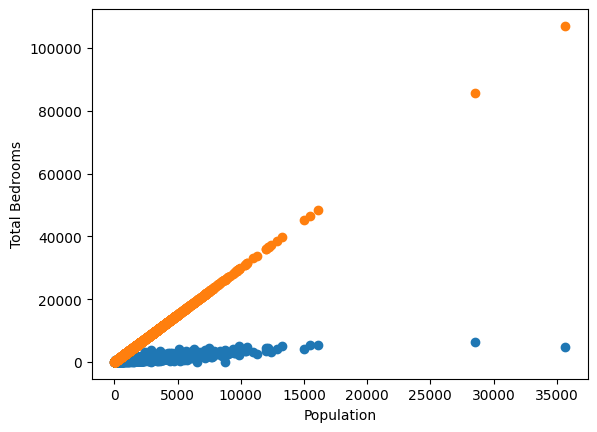

In [14]:
import matplotlib.pyplot as plt
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, get_predictions(test_model, pop_np))

In [22]:
def mean_squared_error(y, y_predictions):
  '''
  Returns the mean squared error given the observed and predicted outputs
  y : np.array of Floats(n) with shape(n,) of observed outputs
  y_predictions : np.array of floats with shape(n,) of predicted outputs

  Returns : Float representing the MSE
'''
  n = len(y)

  return np.sum(np.square(y - y_predictions)) / n

def mean_absolute_error(y, y_predictions):
  '''
  Returns the mean absolute error given the observed and predicted outputs
  y : np.array of Floats(n) with shape(n,) of observed outputs
  y_predictions : np.array of floats with shape(n,) of predicted outputs

  Returns : Float representing the MSE
'''
  n = len(y)
  return np.sum(np.abs(y - y_predictions)) / n

In [23]:
mse1 = mean_squared_error(get_predictions(test_model, pop_np), bedrooms)
mse1

23549577.56382353

In [25]:
mae1 = mean_absolute_error(get_predictions(test_model, pop_np), bedrooms)
mae1

3751.581705882353

In [26]:
def get_best_model(x, y):
  '''Returns the model with parameters that minimizes the MSE
  x: np.array of Floats wirh shape (n,) of inputs
  y: np.array of Floats with shape(n, ) of outputs

  Returns : {'alpha_hat':Float, 'beta_hat':Float} representing the model
  '''
  x_bar = np.average(x)
  y_bar = np.average(y)

  top = np.sum((x - x_bar)*(y - y_bar))
  bot = np.sum((x - x_bar)**2)

  beta_hat = top/bot
  alpha_hat = y_bar - (beta_hat)*(x_bar)

  model = {'alpha_hat': alpha_hat, 'beta_hat': beta_hat}
  return model

In [27]:
best_model = get_best_model(pop_np, bedrooms_np)
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

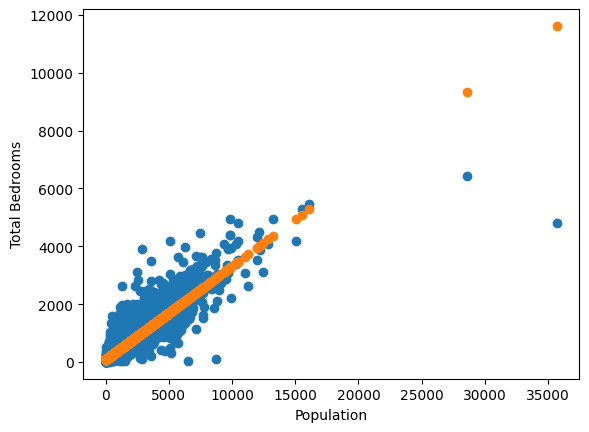

In [30]:
import matplotlib.pyplot as plt
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, get_predictions(best_model, pop_np))

In [32]:
predictions_df['Our_new_predictions'] = get_predictions(best_model, pop_np)
predictions_df

,Population,Bedrooms,Sklearn Bedroom Predictions,Our_new_predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296
